<a href="https://colab.research.google.com/github/jceltruda/Projects-in-AI-and-ML/blob/main/ML_AI_Projects_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 1 - 1.**

####Derivation of the objective function for Logistic Regression using Maximum Likelihood Estimation (MLE):

In logistic regression the sigmoid function models the probability that vector, $X$, corresponds to truth $y=1$:
$$h_\theta(x) = \frac{1}{1 + e^{-\theta^T x}}$$
<br>


The likelihood of this occurance for a distribution can be represented:
$$L(\theta) = P(y_1=1,y_2=1,...,y_n=1\vert X, \theta) = \prod_{i=1}^{m}P(y_i=1\vert x_i, \theta)$$
<br>

Logistic regression models binary outcomes, so we assume the data follows a Bernoulli distribution. This means we can model the likelihood as follows, where we train weights, $\theta$, and have $m$ data points:
$$L(\theta) = Ber(\prod(x_i)) = \prod_{i=1}^{m} (h_\theta(x_i))^{y_{i}} (1 - h_\theta(x_i))^{1-y_{i}}$$
<br>

We can insert the value for $h_\theta(x)$ and algebraically simplify to get:

$$L(\theta) = \prod_{i=1}^{m} (\frac{1}{1 + e^{-\theta^T x_i}})^{y_{i}} (1-\frac{1}{1 + e^{-\theta^T x_i}})^{1-y_{i}}$$
<br>

We are attempting to maximize this likelihood function. This is equivalent to the maximum of the log of the function, so we apply a logarithm to maximize the log-likelihood:

$$l(\theta) = log(L(\theta))$$
$$l(\theta) = log(\prod_{i=1}^{m} (\frac{1}{1 + e^{-\theta^T x_i}})^{y_{i}} (1-\frac{1}{1 + e^{-\theta^T x_i}})^{1-y_{i}})$$
<br>

We can algebraically simplify:

$$l(\theta) = \sum_{i=1}^{m} \left[ y_{i} \log(\frac{1}{1 + e^{-\theta^T x_i}}) + (1-y_{i}) \log(1 - \frac{1}{1 + e^{-\theta^T x_i}}) \right]$$
<br>

Finally, maximizing this function is the same as minimizing the negative likelihood function. We can define our cost function as this, $J(\theta)$:


$$J(\theta) = -\sum_{i=1}^{m} \left[ y_{i} \log(\frac{1}{1 + e^{-\theta^T x_i}}) + (1-y_{i}) \log(1 - \frac{1}{1 + e^{-\theta^T x_i}}) \right]$$

<br>

####Research on the MAP technique for Logistic Regression, and how this technique is different from MLE:

MLE and MAP are very similar overall, they aim to help find parameters that maximize the a desired function, for MLE this is the probability of observing the given data, for MAP this is the posterior probability. MAP views parameters as random variables with distributions in addition to the data. Map is derived from Bayes theorem, and can be viewed as a form of regularization.
<br>
<br>
Resources:
* https://www.geeksforgeeks.org/data-science/mle-vs-map/
* https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote06.html
* https://sassafras13.github.io/MLEvsMAP/

**Task 1 - 2.**

I would like to diagnose heart disease using Logistic Regression. This is the best method for this problem as diagnosing heart disease is a binary classification, of which logistic regression is suited for. Another linear method, such as linear regression, outputs continuous values from negative to positive infinity, which doesn't suit our classification problem as well. Logistic regression outputs a value between 0 and 1, which can be interpreted as the probability of having the disease.

**Task 1 - 3.**

####Dataset (Heart Disease Prediction) correspondance to equations<br>
*$\theta$: The weights to be learned by the model<br>
*$m$: Total number of records (rows) in dataset<br>
*$x_i$: One feature (column) in the dataset<br>
*$y_i$: The label for a specific row; 0 or 1, no heart disease or heart disease present<br>
*$h_\theta(x_{i})$: The model's predicted label for a specific record

####Assumptions in derivation
Some key assumptions were made allowing for the derivation shown earlier:
* Bernoulli Distribution: I assumed that the labels for the dataset were binary, meaning the only possible values for $y$ are 0 and 1.
* Independent and identically distributed (IID) Data: Assumed that the sampled data points are independant of one another.

**Task 2 - 1.**

I selected a Heart Disease Prediction Dataset from kaggle which has 14 features:
https://www.kaggle.com/datasets/neurocipher/heartdisease

**Task 2 - 2.**

2. EDA with VIF:

In [ ]:
!pip install kagglehub[pandas-datasets]

/tmp/ipython-input-3236417789.py:11: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'heartdisease' dataset.
   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1              

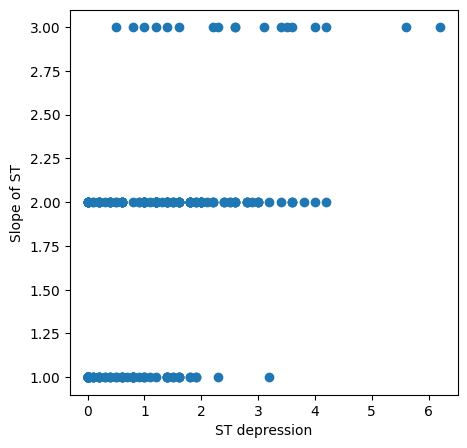

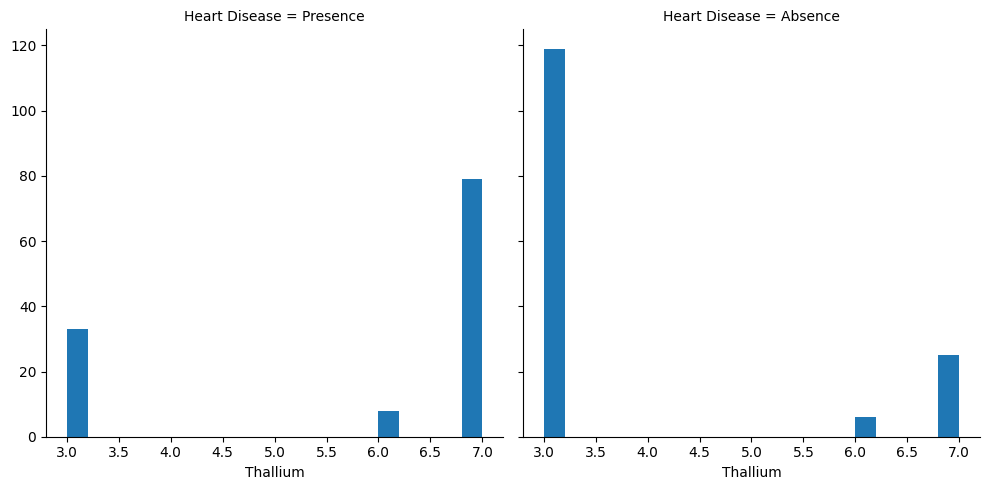

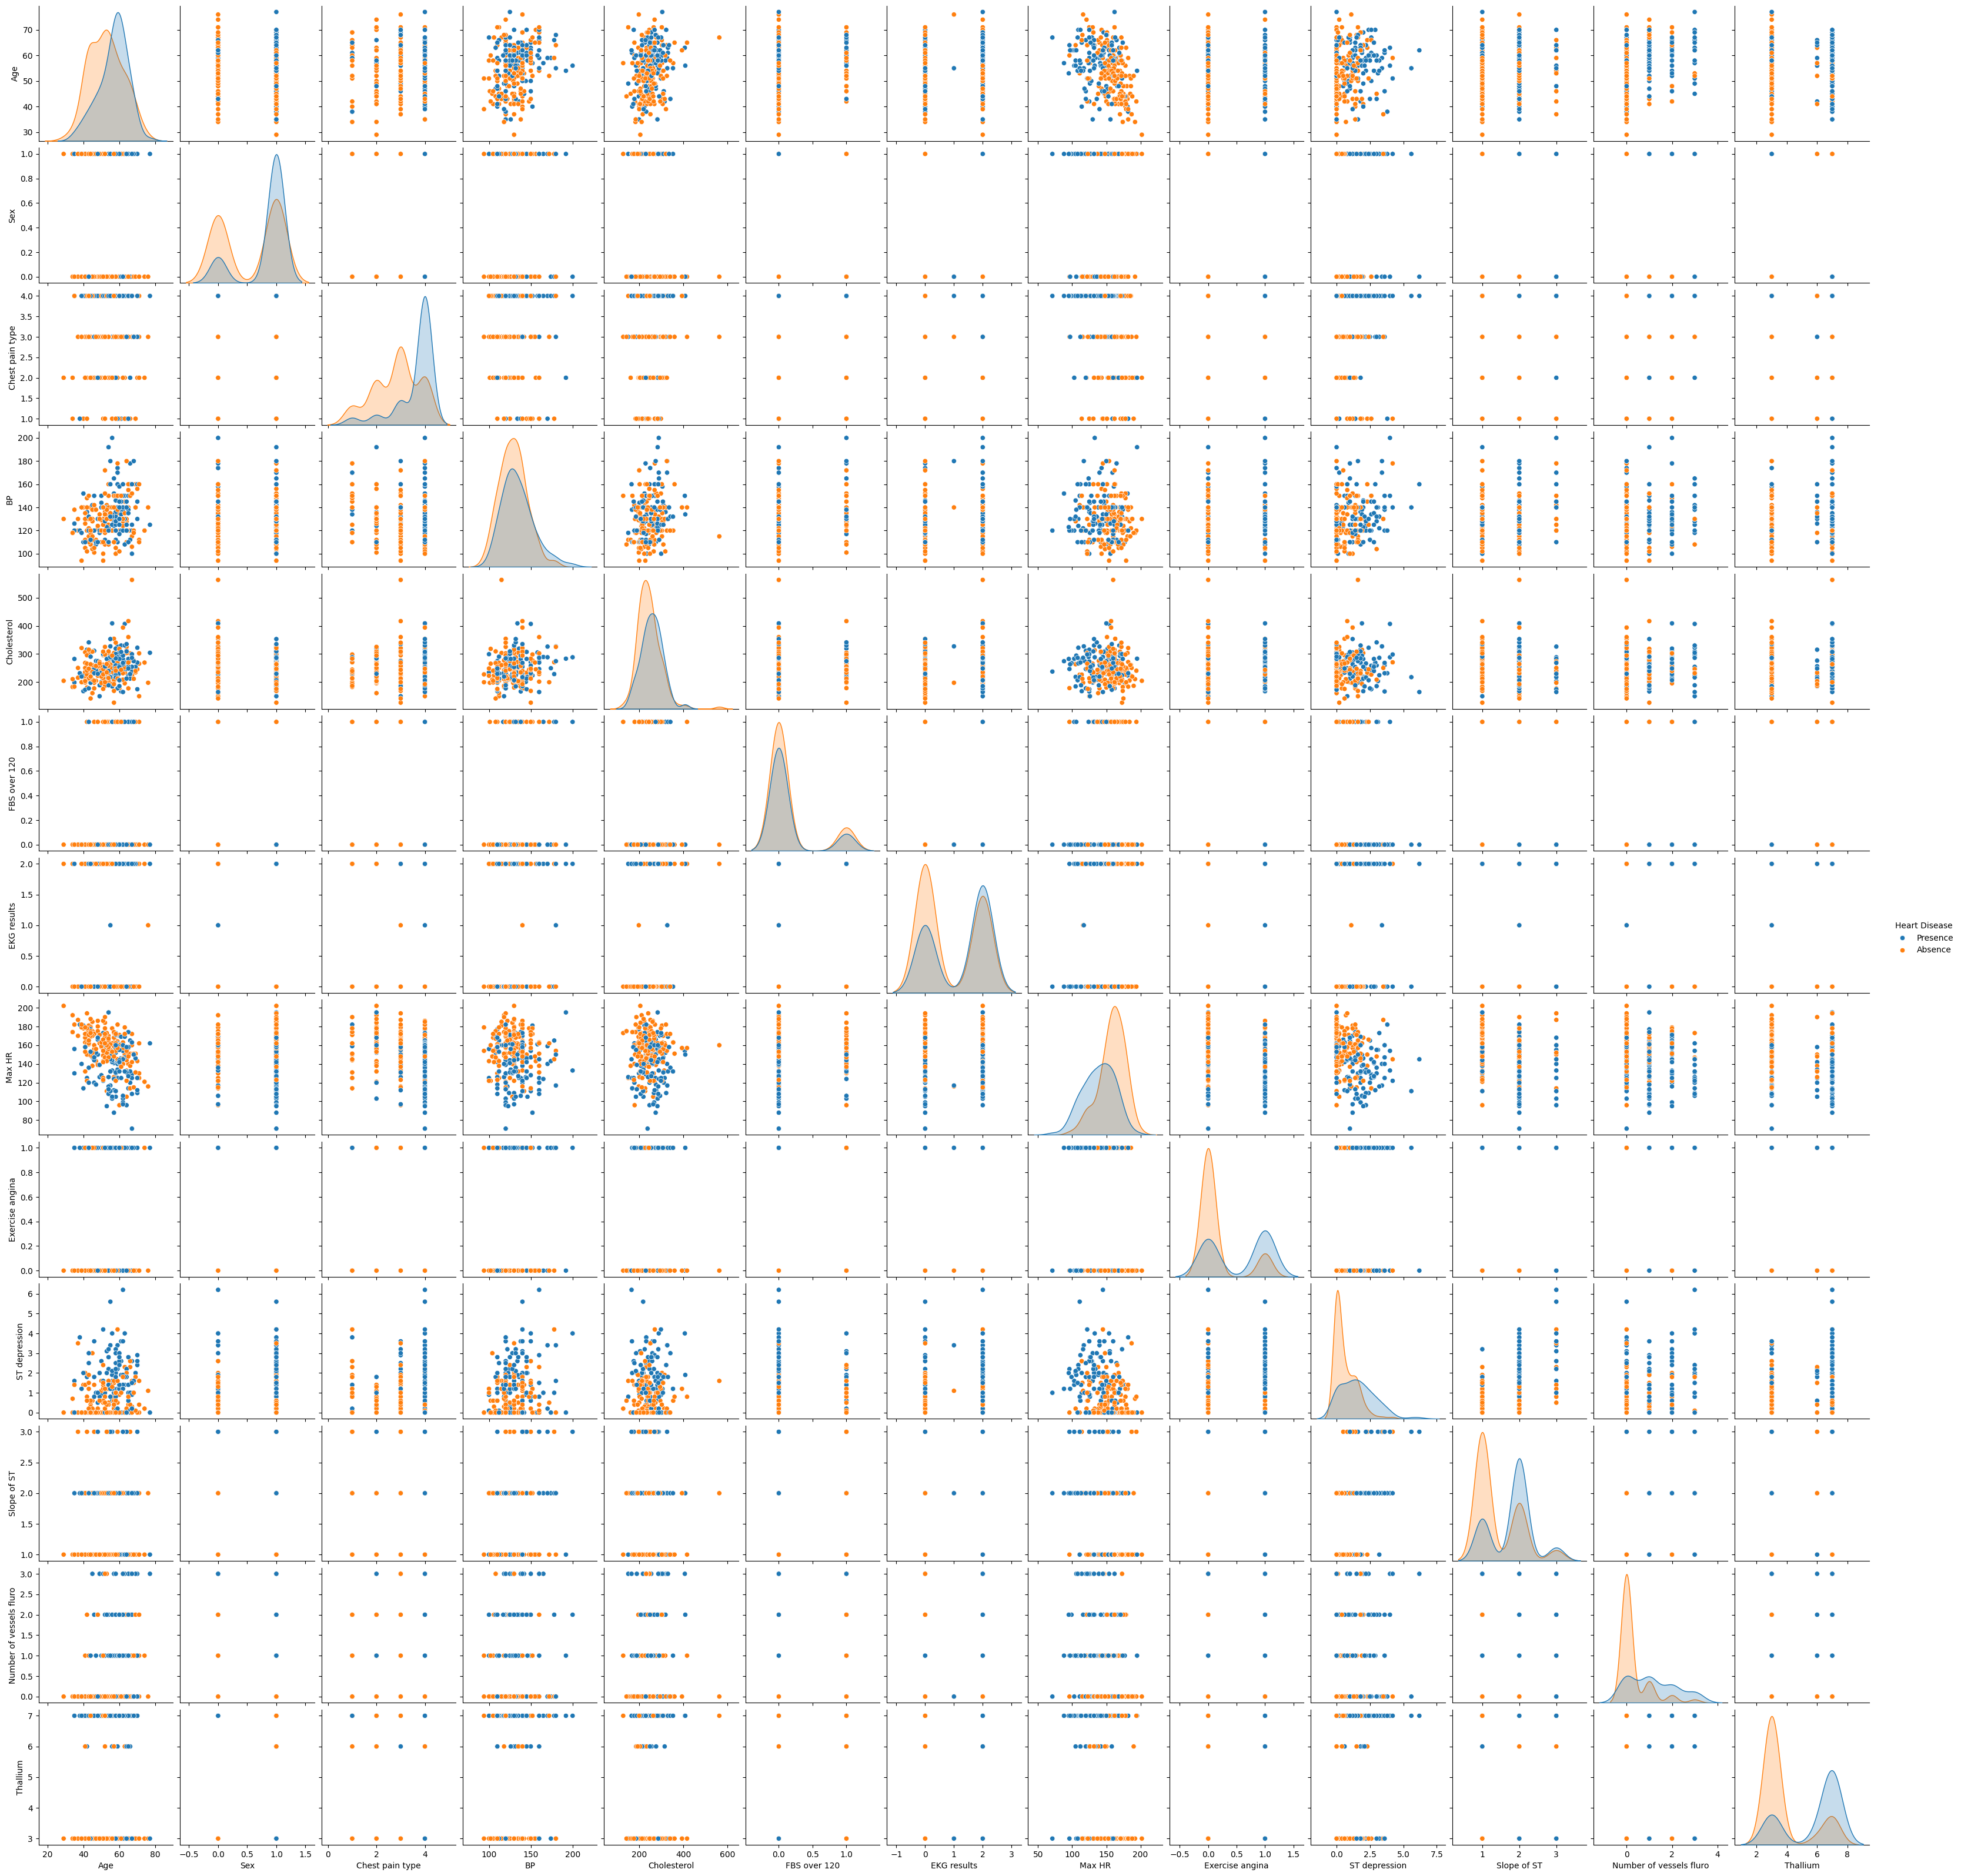

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
from statsmodels.tools.tools import add_constant

# Load dataset
file_path = "Heart_Disease_Prediction.csv"
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "neurocipher/heartdisease",
  file_path,
)

# 2.2 - EDA
print(df.head())
print(df.shape) # Check size/shape
print(df.isna().sum()) # Check for Null data

# Hypothesis that 'ST depression' and 'Slope of ST' highly correlated
# Evaluate correlation between 'ST depression' and 'Slope of ST'
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df['ST depression'], df['Slope of ST'])
ax.set_xlabel('ST depression')
ax.set_ylabel('Slope of ST')

# Evaluate disease distribution of dataset
g = sns.FacetGrid(df, col='Heart Disease', height=5)
g.map(plt.hist, 'Thallium', bins=20)

# Further investigate pair relationships
sns.pairplot(df, hue='Heart Disease')

# VIF
features = df.drop(columns=['Heart Disease'], errors='ignore').select_dtypes(include=['number']) # Remove labels
vif = pd.DataFrame()
vif["Feature"] = features.columns
vif["VIF"] = [variance_inflation_factor(features.values, i)
                   for i in range(len(features.columns))]
print(vif.sort_values(by="VIF", ascending=False))

In [ ]:
# Handle high correlation shown with VIF
vif_improvement = add_constant(features)

# 2. Re-evaluate VIF after fix
vif = pd.DataFrame()
vif["Feature"] = vif_improvement.columns
vif["VIF"] = [variance_inflation_factor(vif_improvement.values, i)
                   for i in range(len(vif_improvement.columns))]
vif = vif[vif["Feature"] != "const"]
print(vif.sort_values(by="VIF", ascending=False))

                    Feature       VIF
10            ST depression  1.820562
11              Slope of ST  1.780534
8                    Max HR  1.649869
13                 Thallium  1.509792
1                       Age  1.495214
9           Exercise angina  1.370100
12  Number of vessels fluro  1.316356
2                       Sex  1.315271
3           Chest pain type  1.293339
4                        BP  1.210884
5               Cholesterol  1.165713
7               EKG results  1.092436
6              FBS over 120  1.081175


**Task 2 - 2. Explanation**

I performed standard data exploration, such as checking dataset shape, value types, and null value counts. I examined the relationship between 'ST depression' and 'Slope of ST' as I suspected they may be correlated.

VIF revealed extremely high multicollinearity, which I addressed by adding a constant to the feature matrix, representing an intercept. This greatly reduced VIF scores to an acceptable level, signifying low multicollinearity between the features.

**Task 2 - 3.**

Visualize Feature Relationships

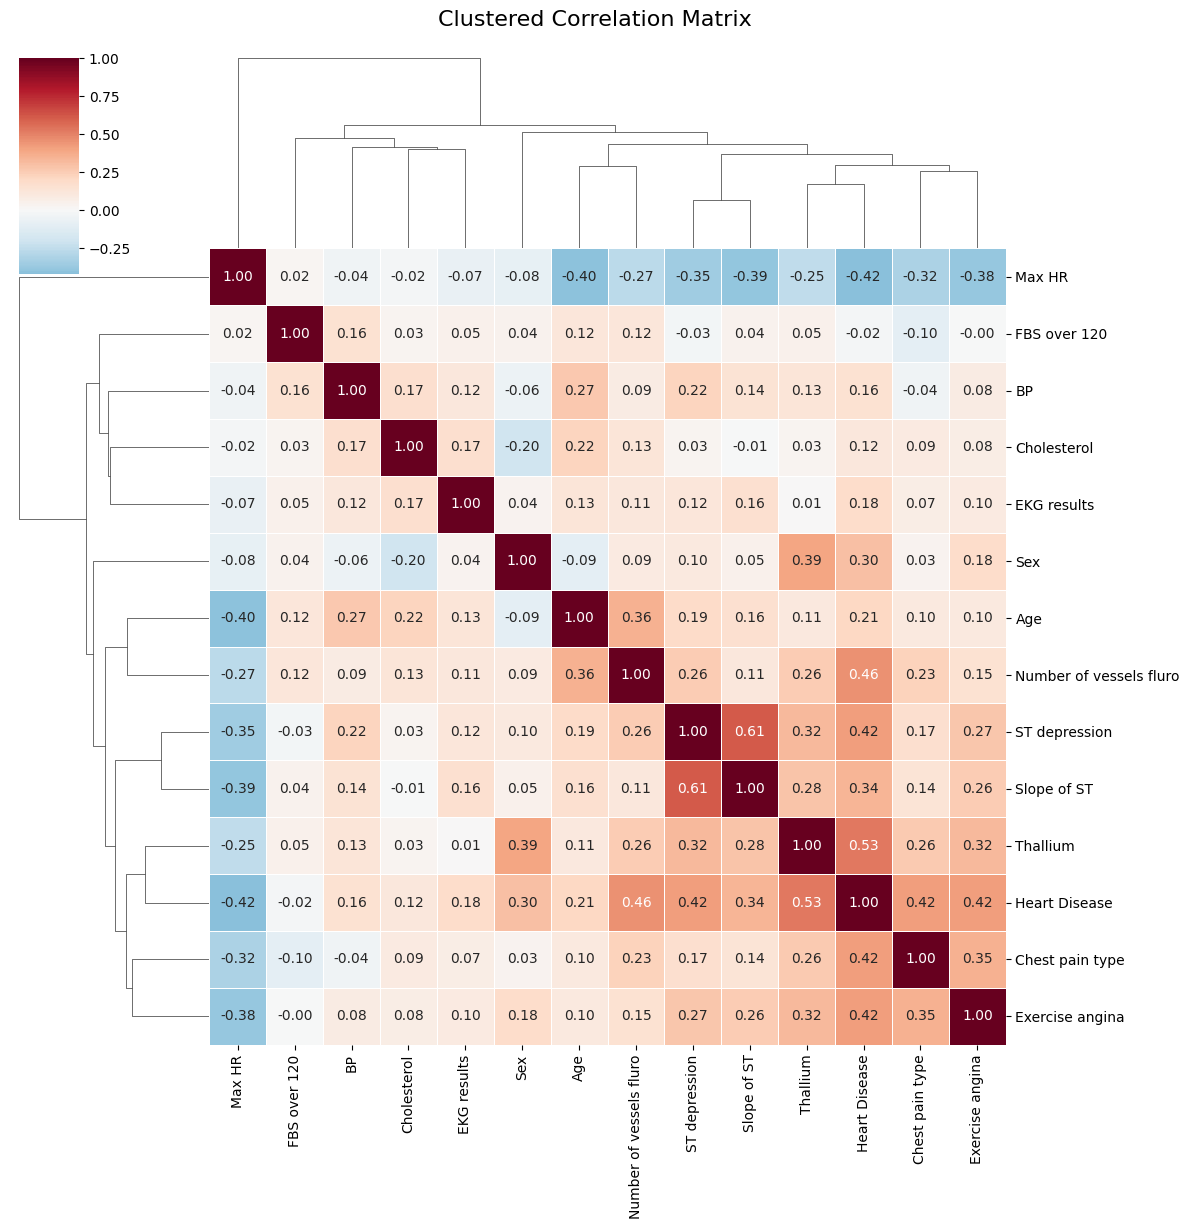

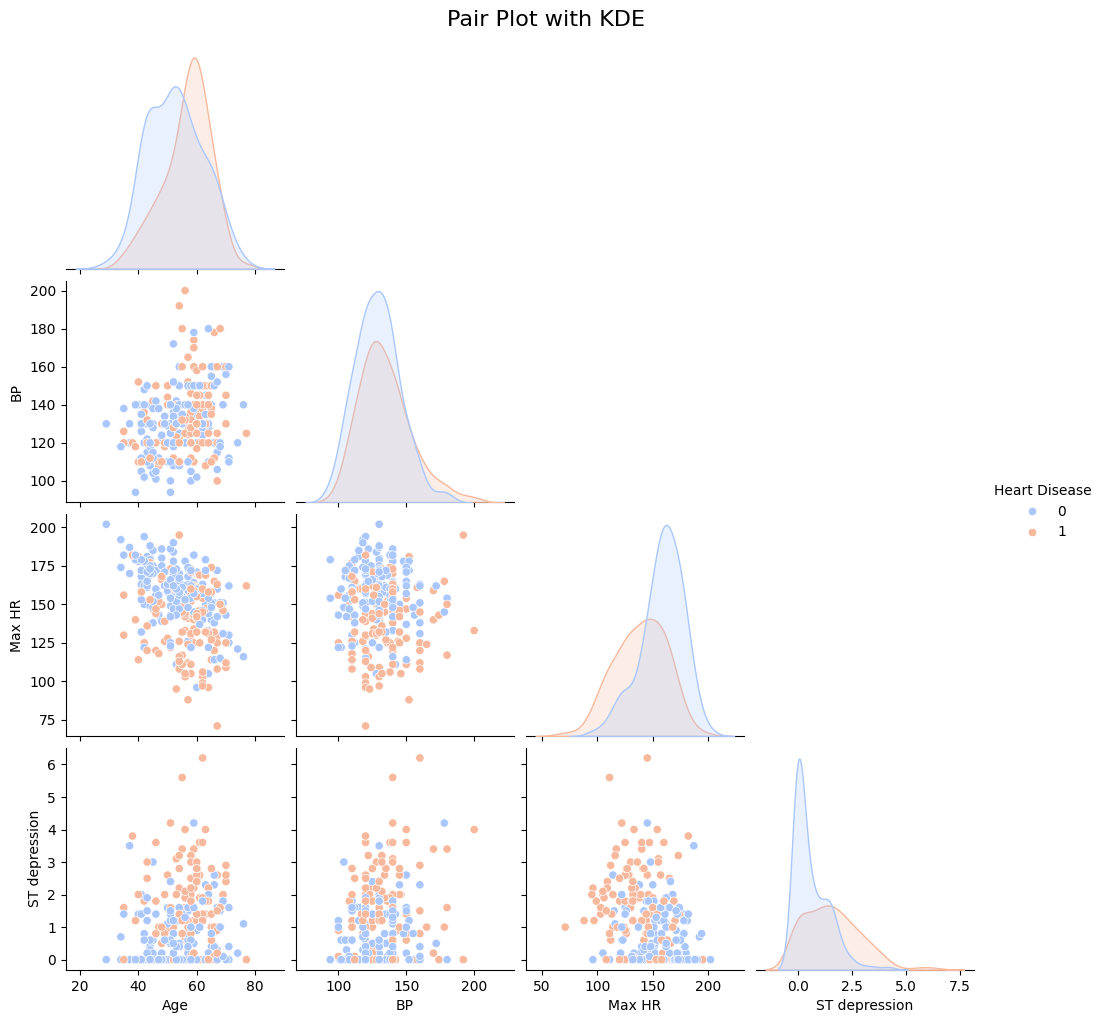

In [ ]:
# Copy df for visualization
df_copy = df.copy()

# Map target to numeric for correlation calculation (safely)
if df_copy['Heart Disease'].dtype == 'object':
    df_copy['Heart Disease'] = df_copy['Heart Disease'].map({'Presence': 1, 'Absence': 0}) # Refactor to 1, 0

# Heatmap with clustering
g = sns.clustermap(df_copy.corr(), annot=True, fmt=".2f", cmap='RdBu_r', center=0,
               linewidths=0.5, cbar_kws={"shrink": .8}, figsize=(12, 12))
g.fig.suptitle('Clustered Correlation Matrix', y=1.02, fontsize=16)
plt.show()

# Pair plot with KDE
cols_to_plot = ['Age', 'BP', 'Max HR', 'ST depression', 'Heart Disease']
sns.pairplot(df_copy[cols_to_plot], hue='Heart Disease',
             kind='scatter', diag_kind='kde',
             palette='coolwarm', corner=True)
plt.suptitle('Pair Plot with KDE', y=1.02, fontsize=16)
plt.show()

**Task 3 - 1.**

Implement Logistic Regression:

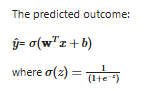

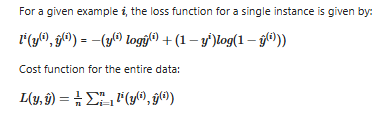

In [ ]:
import numpy as np

# Create X, y for training
X = vif_improvement.values # Use features from VIF
if df['Heart Disease'].dtype == 'object':
    y = df['Heart Disease'].map({'Presence': 1, 'Absence': 0}).values # Convert labels to 0, 1
else:
    y = df['Heart Disease'].values

# Logistic Regression
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def cost(X, y, weights):
  h = sigmoid(np.dot(X, weights))
  N = len(y)
  return -1/N * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))

def logistic_regression(X, y, eta=0.01, epochs=100):
    N, D = X.shape
    weights = np.zeros(D)

    cost_history = []

    for _ in range(epochs):
        y_pred = sigmoid(np.dot(X, weights))
        gradient = np.dot(X.T, (y_pred - y)) / N
        weights -= eta * gradient
        cost_history.append(cost(X, y, weights))

    return weights, cost_history

In [ ]:
# Test logistic regression accuracy

# Copy for running algs
data = df.copy()
if data['Heart Disease'].dtype == 'object':
    data['Heart Disease'] = data['Heart Disease'].map({'Presence': 1, 'Absence': 0})
y = data['Heart Disease'].values
X_values = data.drop(columns=['Heart Disease']).select_dtypes(include=['number']).values

# Normalize data
mean = np.mean(X_values, axis=0)
std = np.std(X_values, axis=0)
temp = (X_values - mean) / std

# Add Bias
X = np.hstack([np.ones((temp.shape[0], 1)), temp])

# Training
final_weights, cost_hist = logistic_regression(X, y, eta=0.1, epochs=1000)

# Calculate Accuracy
predictions = sigmoid(np.dot(X, final_weights))
predicted_labels = [1 if p >= 0.5 else 0 for p in predictions]
accuracy = np.mean(predicted_labels == y)

print(f"Final Cost: {cost_hist[-1]:.4f}")
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Final Cost: 0.3326
Model Accuracy: 85.56%


**Task 3 - 2.**

Implement gradient descent variants:

In [ ]:
# Batch Gradient Descent
def batch_gradient_descent(X, y, eta=0.01, epochs=100):
    N, D = X.shape
    weights = np.zeros(D)
    cost_history = []

    for _ in range(epochs):
        y_pred = sigmoid(np.dot(X, weights))
        gradient = np.dot(X.T, (y_pred - y)) / N
        weights -= eta * gradient

        cost_history.append(cost(X, y, weights))

    return weights, cost_history

# Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, eta=0.01, epochs=100):
    N, D = X.shape
    weights = np.zeros(D)
    cost_history = []

    for _ in range(epochs):
        indices = np.random.permutation(N)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(N):
            # Update with single sample
            xi = X_shuffled[i:i+1]
            yi = y_shuffled[i:i+1]

            y_pred = sigmoid(np.dot(xi, weights))
            gradient = np.dot(xi.T, (y_pred - yi))
            weights -= eta * gradient

        cost_history.append(cost(X, y, weights))

    return weights, cost_history

# Mini-Batch Gradient Descent
def minibatch_gradient_descent(X, y, eta=0.01, epochs=100, batch_size=32):
    N, D = X.shape
    weights = np.zeros(D)
    cost_history = []

    for _ in range(epochs):
        indices = np.random.permutation(N)
        X_shuffled = X[indices] # Shuffle data
        y_shuffled = y[indices]

        # Process in batches
        for i in range(0, N, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            # Update in batches
            y_pred = sigmoid(np.dot(X_batch, weights))
            gradient = np.dot(X_batch.T, (y_pred - y_batch)) / len(y_batch)
            weights -= eta * gradient

        cost_history.append(cost(X, y, weights))

    return weights, cost_history

Batch GD: Final Cost = 0.3341 | Accuracy = 84.81%
Stochastic GD: Final Cost = 0.3326 | Accuracy = 85.56%
Mini-Batch GD: Final Cost = 0.3326 | Accuracy = 85.56%


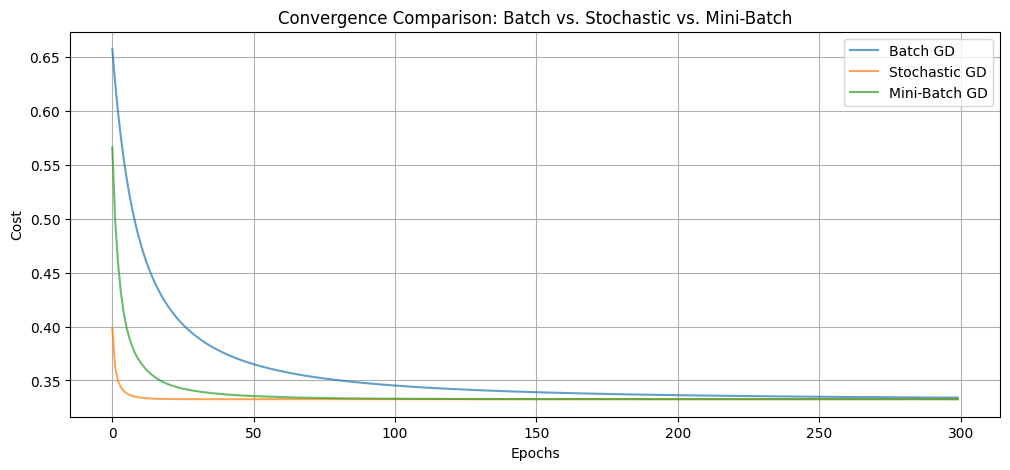

In [ ]:
# Test gradient descent variants
models = {
    "Batch GD": batch_gradient_descent(X, y, eta=0.1, epochs=300),
    "Stochastic GD": stochastic_gradient_descent(X, y, eta=0.01, epochs=300),
    "Mini-Batch GD": minibatch_gradient_descent(X, y, eta=0.05, epochs=300, batch_size=32)
}

plt.figure(figsize=(12, 5))
for name, (weights, costs) in models.items():
    plt.plot(costs, label=name, alpha=0.7) # Plot cost

    # Calculate accuracy
    preds = sigmoid(np.dot(X, weights)) >= 0.5
    acc = np.mean(preds == y) * 100
    print(f"{name}: Final Cost = {costs[-1]:.4f} | Accuracy = {acc:.2f}%")

plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.title("Convergence Comparison: Batch vs. Stochastic vs. Mini-Batch")
plt.legend()
plt.grid(True)
plt.show()

**Task 3 - 2. Explanation**


As seen above, the three gradient descent variants all converge to very similar values, but reach this value at different rates. Batch gradient descent has the lowest rate of change as it updates its weights only once per epoch. Stochastic gradient descent converges the fastest as it performs more updates per epoch, leading it to iterate faster and make sharper changes. Mini-batch gradient descent falls between the others in epochs to convergence and updates to its weights.

**Task 4 - 1.**

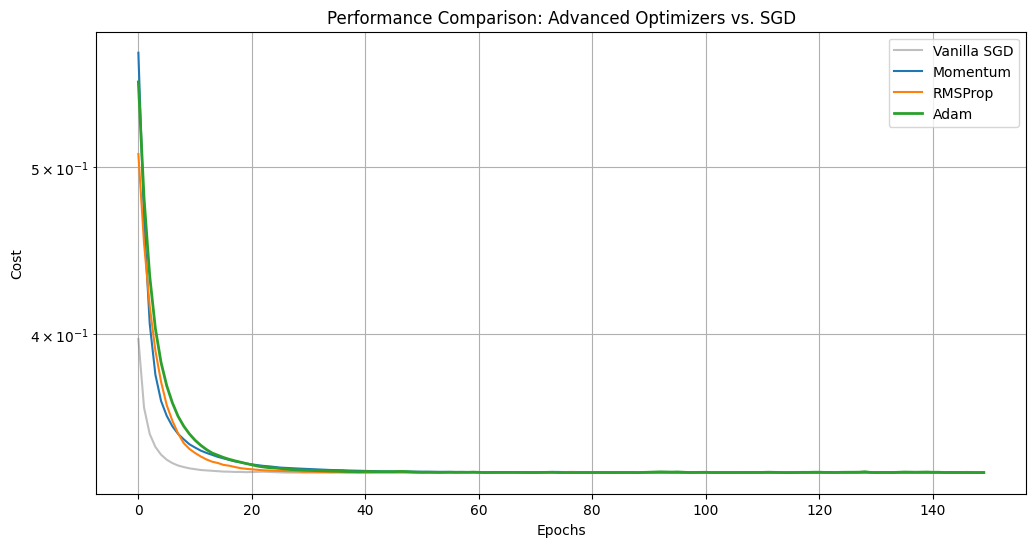

In [ ]:
# Gradient Descent with Momentum
def gd_momentum(X, y, eta=0.01, beta=0.9, epochs=100, batch_size=32):
    N, D = X.shape
    weights = np.zeros(D)
    velocity = np.zeros(D)
    cost_history = []

    for _ in range(epochs):
        indices = np.random.permutation(N)
        X_shuffled, y_shuffled = X[indices], y[indices]

        for i in range(0, N, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            y_pred = sigmoid(np.dot(X_batch, weights))
            gradient = np.dot(X_batch.T, (y_pred - y_batch)) / len(y_batch)

            # Update Velocity and Weights
            velocity = beta * velocity + eta * gradient
            weights -= velocity

        cost_history.append(cost(X, y, weights))
    return weights, cost_history

# RMSProp
def gd_rmsprop(X, y, eta=0.01, beta=0.9, epsilon=1e-8, epochs=100, batch_size=32):
    N, D = X.shape
    weights = np.zeros(D)
    cache = np.zeros(D)
    cost_history = []

    for _ in range(epochs):
        indices = np.random.permutation(N)
        X_shuffled, y_shuffled = X[indices], y[indices]

        for i in range(0, N, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            y_pred = sigmoid(np.dot(X_batch, weights))
            gradient = np.dot(X_batch.T, (y_pred - y_batch)) / len(y_batch)

            # Update Cache
            cache = beta * cache + (1 - beta) * (gradient ** 2)

            # Update Weights
            weights -= (eta / (np.sqrt(cache) + epsilon)) * gradient

        cost_history.append(cost(X, y, weights))
    return weights, cost_history

# Adam
def gd_adam(X, y, eta=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8, epochs=100, batch_size=32):
    N, D = X.shape
    weights = np.zeros(D)
    m = np.zeros(D)
    v = np.zeros(D)
    t = 0 # Time step
    cost_history = []

    for _ in range(epochs):
        indices = np.random.permutation(N)
        X_shuffled, y_shuffled = X[indices], y[indices]

        for i in range(0, N, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            t += 1

            y_pred = sigmoid(np.dot(X_batch, weights))
            gradient = np.dot(X_batch.T, (y_pred - y_batch)) / len(y_batch)

            # Update Moments
            m = beta1 * m + (1 - beta1) * gradient
            v = beta2 * v + (1 - beta2) * (gradient ** 2)

            # Bias Correction
            m_hat = m / (1 - beta1 ** t)
            v_hat = v / (1 - beta2 ** t)

            # Update Weights
            weights -= (eta / (np.sqrt(v_hat) + epsilon)) * m_hat

        cost_history.append(cost(X, y, weights))
    return weights, cost_history

# Run Algorithms
epochs = 150
w_sgd, cost_sgd = stochastic_gradient_descent(X, y, eta=0.01, epochs=epochs)
w_mom, cost_mom = gd_momentum(X, y, eta=0.01, epochs=epochs)
w_rms, cost_rms = gd_rmsprop(X, y, eta=0.01, epochs=epochs)
w_adam, cost_adam = gd_adam(X, y, eta=0.01, epochs=epochs)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(cost_sgd, label='Vanilla SGD', alpha=0.5, color='gray')
plt.plot(cost_mom, label='Momentum')
plt.plot(cost_rms, label='RMSProp')
plt.plot(cost_adam, label='Adam', linewidth=2)

plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Performance Comparison: Advanced Optimizers vs. SGD')
plt.legend()
plt.yscale('log')
plt.grid(True, which="both", ls="-")
plt.show()

**Task 4 - 1. Explanation**

All optimization algorithms converged to the same cost value as each other and vanilla stochastic gradient descent. Vanilla converged to this value the fastest, while the others lagged as they start slower and adapt to change their weights more rapidly as changes pick up "momentum".

**Task 4 - 2.**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model(name, weights, X, y):
    # Generate predictions
    probs = sigmoid(np.dot(X, weights))
    preds = (probs >= 0.5).astype(int)

    metrics = {
        "Algorithm": name,
        "Accuracy": accuracy_score(y, preds),
        "Precision": precision_score(y, preds),
        "Recall": recall_score(y, preds),
        "F1 Score": f1_score(y, preds)
    }
    return metrics

# Run evaluation
trained_models = [
    ("Vanilla SGD", w_sgd),
    ("Momentum", w_mom),
    ("RMSProp", w_rms),
    ("Adam", w_adam)
]

results = []
for name, weights in trained_models:
    results.append(evaluate_model(name, weights, X, y))

# Print results
results_df = pd.DataFrame(results)
print(results_df)

     Algorithm  Accuracy  Precision    Recall  F1 Score
0  Vanilla SGD  0.855556   0.852174  0.816667  0.834043
1     Momentum  0.855556   0.852174  0.816667  0.834043
2      RMSProp  0.855556   0.852174  0.816667  0.834043
3         Adam  0.855556   0.852174  0.816667  0.834043


**Task 4 - 2. Explanation**

Shockingly, all algorithms converged to the same values. This is likely due to the values in the dataset, certain datapoints being easy to predict and the same outliers tripping the models up. This means all models found the minimum of the loss function after training.

**Task 4 - 3.**


In [ ]:
def grid_search_optimizer(optimizer_func, X, y, param_grid, name):
    best_score = 0
    best_params = {}
    best_weights = None
    results = []

    for eta in param_grid['eta']:
        # Train model with current hyperparameter
        weights, cost_hist = optimizer_func(X, y, eta=eta, epochs=200)

        # Evaluate Accuracy
        probs = sigmoid(np.dot(X, weights))
        preds = (probs >= 0.5).astype(int)
        accuracy = np.mean(preds == y)

        results.append((eta, accuracy))

        # Update best result tracking
        if accuracy > best_score:
            best_score = accuracy
            best_params = {'eta': eta}
            best_weights = weights

    print(f"Best Accuracy: {best_score:.4f} | Best Params: {best_params}\n")
    return best_params, best_score

# Parameter grid
param_grid = {
    'eta': [0.1, 0.05, 0.01, 0.001, 0.0001]
}

# Run grid search
best_mom_params, _ = grid_search_optimizer(gd_momentum, X, y, param_grid, "Momentum")
best_rms_params, _ = grid_search_optimizer(gd_rmsprop, X, y, param_grid, "RMSProp")
best_adam_params, _ = grid_search_optimizer(gd_adam, X, y, param_grid, "Adam")

print(f"Best rates: Momentum={best_mom_params['eta']}, RMSProp={best_rms_params['eta']}, Adam={best_adam_params['eta']}")

Best Accuracy: 0.8667 | Best Params: {'eta': 0.05}

Best Accuracy: 0.8704 | Best Params: {'eta': 0.05}

Best Accuracy: 0.8593 | Best Params: {'eta': 0.1}

Best rates: Momentum=0.05, RMSProp=0.05, Adam=0.1


**Task 4 - 4.**

- **Vanilla SGD:** Most memory-efficient but can be sporatic and over adjust.
- **Momentum:** Improves convergence speed and stability but uses more memory
- **Adam:** Uses adaptive learning rates but can start slow.
